In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [207]:
# Download The necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/scorpion/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/scorpion/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/scorpion/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [208]:
# Load the data
df = pd.read_csv(r"amazon_cells_labelled.txt",sep="\t",header = None)
df.columns = ["Comment","label"]
df

,Comment,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [209]:
df.shape

(1000, 2)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  1000 non-null   object
 1   label    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [211]:
df.describe()

,label
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [212]:
df.label.value_counts()

label
0    500
1    500
Name: count, dtype: int64

In [213]:
df.label.value_counts(normalize=True)

label
0    0.5
1    0.5
Name: proportion, dtype: float64

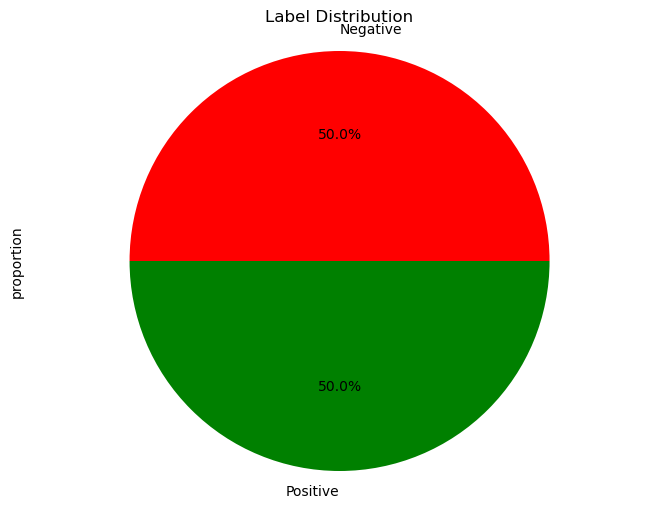

In [214]:
plt.figure(figsize=(8, 6))
df.label.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Negative', 'Positive'], colors=['red', 'green'])
plt.title('Label Distribution')
plt.axis('equal')
plt.show()


In [215]:
# Function to remove punctuation from a comment
def remove_punctiation(comment):
  comment_nopunct = "".join([char for char in comment if char not in string.punctuation])
  return comment_nopunct

# Apply remove_punctuation function to each comment and convert to lowercase
df["Comment_nopunct"] = df["Comment"].apply(lambda x : remove_punctiation(x.lower()))
df

,Comment,label,Comment_nopunct
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great for the jawbone
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...
4,The mic is great.,1,the mic is great
...,...,...,...
995,The screen does get smudged easily because it ...,0,the screen does get smudged easily because it ...
996,What a piece of junk.. I lose more calls on th...,0,what a piece of junk i lose more calls on this...
997,Item Does Not Match Picture.,0,item does not match picture
998,The only thing that disappoint me is the infra...,0,the only thing that disappoint me is the infra...


In [216]:
# Tokenize each comment
def tokenize(comment):
    tokens = word_tokenize(comment)
    return tokens

df['Comment_tokenized'] = df['Comment_nopunct'].apply(lambda x : tokenize(x))
df.head()

,Comment,label,Comment_nopunct,Comment_tokenized
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,good case excellent value,"[good, case, excellent, value]"
2,Great for the jawbone.,1,great for the jawbone,"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,the mic is great,"[the, mic, is, great]"


In [217]:
# Define and remove English stopwords
stopwords_english = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_english]
    return text

df['Comment_nostopwords'] = df['Comment_tokenized'].apply(lambda x : remove_stopwords(x))
df.head(10)

,Comment,label,Comment_nopunct,Comment_tokenized,Comment_nostopwords
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...","[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.",1,good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]"
2,Great for the jawbone.,1,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi..."
4,The mic is great.,1,the mic is great,"[the, mic, is, great]","[mic, great]"
5,I have to jiggle the plug to get it to line up...,0,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...","[jiggle, plug, get, line, right, get, decent, ..."
6,If you have several dozen or several hundred c...,0,if you have several dozen or several hundred c...,"[if, you, have, several, dozen, or, several, h...","[several, dozen, several, hundred, contacts, i..."
7,If you are Razr owner...you must have this!,1,if you are razr owneryou must have this,"[if, you, are, razr, owneryou, must, have, this]","[razr, owneryou, must]"
8,"Needless to say, I wasted my money.",0,needless to say i wasted my money,"[needless, to, say, i, wasted, my, money]","[needless, say, wasted, money]"
9,What a waste of money and time!.,0,what a waste of money and time,"[what, a, waste, of, money, and, time]","[waste, money, time]"


In [218]:
# Lemmatize the words
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['Comment_lemmatized'] = df['Comment_nostopwords'].apply(lambda x : lemmatizing(x))

df.head(10)

,Comment,label,Comment_nopunct,Comment_tokenized,Comment_nostopwords,Comment_lemmatized
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...,"[so, there, is, no, way, for, me, to, plug, it...","[way, plug, us, unless, go, converter]","[way, plug, u, unless, go, converter]"
1,"Good case, Excellent value.",1,good case excellent value,"[good, case, excellent, value]","[good, case, excellent, value]","[good, case, excellent, value]"
2,Great for the jawbone.,1,great for the jawbone,"[great, for, the, jawbone]","[great, jawbone]","[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...,"[tied, to, charger, for, conversations, lastin...","[tied, charger, conversations, lasting, 45, mi...","[tied, charger, conversation, lasting, 45, min..."
4,The mic is great.,1,the mic is great,"[the, mic, is, great]","[mic, great]","[mic, great]"
5,I have to jiggle the plug to get it to line up...,0,i have to jiggle the plug to get it to line up...,"[i, have, to, jiggle, the, plug, to, get, it, ...","[jiggle, plug, get, line, right, get, decent, ...","[jiggle, plug, get, line, right, get, decent, ..."
6,If you have several dozen or several hundred c...,0,if you have several dozen or several hundred c...,"[if, you, have, several, dozen, or, several, h...","[several, dozen, several, hundred, contacts, i...","[several, dozen, several, hundred, contact, im..."
7,If you are Razr owner...you must have this!,1,if you are razr owneryou must have this,"[if, you, are, razr, owneryou, must, have, this]","[razr, owneryou, must]","[razr, owneryou, must]"
8,"Needless to say, I wasted my money.",0,needless to say i wasted my money,"[needless, to, say, i, wasted, my, money]","[needless, say, wasted, money]","[needle, say, wasted, money]"
9,What a waste of money and time!.,0,what a waste of money and time,"[what, a, waste, of, money, and, time]","[waste, money, time]","[waste, money, time]"


In [219]:
df1=df[["label","Comment","Comment_lemmatized"]]
df1

,label,Comment,Comment_lemmatized
0,0,So there is no way for me to plug it in here i...,"[way, plug, u, unless, go, converter]"
1,1,"Good case, Excellent value.","[good, case, excellent, value]"
2,1,Great for the jawbone.,"[great, jawbone]"
3,0,Tied to charger for conversations lasting more...,"[tied, charger, conversation, lasting, 45, min..."
4,1,The mic is great.,"[mic, great]"
...,...,...,...
995,0,The screen does get smudged easily because it ...,"[screen, get, smudged, easily, touch, ear, face]"
996,0,What a piece of junk.. I lose more calls on th...,"[piece, junk, lose, call, phone]"
997,0,Item Does Not Match Picture.,"[item, match, picture]"
998,0,The only thing that disappoint me is the infra...,"[thing, disappoint, infra, red, port, irda]"


In [220]:
df2=df1[["label","Comment"]]
df2['Comment_sentences'] = df1['Comment_lemmatized'].apply(lambda x: ' '.join(x))
df2

,label,Comment,Comment_sentences
0,0,So there is no way for me to plug it in here i...,way plug u unless go converter
1,1,"Good case, Excellent value.",good case excellent value
2,1,Great for the jawbone.,great jawbone
3,0,Tied to charger for conversations lasting more...,tied charger conversation lasting 45 minutesma...
4,1,The mic is great.,mic great
...,...,...,...
995,0,The screen does get smudged easily because it ...,screen get smudged easily touch ear face
996,0,What a piece of junk.. I lose more calls on th...,piece junk lose call phone
997,0,Item Does Not Match Picture.,item match picture
998,0,The only thing that disappoint me is the infra...,thing disappoint infra red port irda


In [221]:
vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(df2['Comment_sentences'])
print("Sparse Matrix Shape: ", features_cv.shape)

features_cv_df = pd.DataFrame(features_cv.toarray(), columns=vectorizer.get_feature_names_out())
print(features_cv_df)

Sparse Matrix Shape:  (1000, 1665)
     10  100  11  12  13  15  18  20  2000  2005  ...  wrongfirst  year  \
0     0    0   0   0   0   0   0   0     0     0  ...           0     0   
1     0    0   0   0   0   0   0   0     0     0  ...           0     0   
2     0    0   0   0   0   0   0   0     0     0  ...           0     0   
3     0    0   0   0   0   0   0   0     0     0  ...           0     0   
4     0    0   0   0   0   0   0   0     0     0  ...           0     0   
..   ..  ...  ..  ..  ..  ..  ..  ..   ...   ...  ...         ...   ...   
995   0    0   0   0   0   0   0   0     0     0  ...           0     0   
996   0    0   0   0   0   0   0   0     0     0  ...           0     0   
997   0    0   0   0   0   0   0   0     0     0  ...           0     0   
998   0    0   0   0   0   0   0   0     0     0  ...           0     0   
999   0    0   0   0   0   0   0   0     0     0  ...           0     0   

     yearsgreat  yell  yes  yet  youd  youll  z500a  zero  
0   

In [222]:
# Feature extraction
df2['Comment_length'] = df1['Comment'].apply(lambda x : len(x))  # Length of the comment
def count_punct(text):
    if len(text) == 0:
        return 0
    else:
        count = sum([1 for char in text if char in string.punctuation])
        return count / len(text)

df2['puncts'] = df2['Comment'].apply(count_punct)
df2

,label,Comment,Comment_sentences,Comment_length,puncts
0,0,So there is no way for me to plug it in here i...,way plug u unless go converter,82,0.012195
1,1,"Good case, Excellent value.",good case excellent value,27,0.074074
2,1,Great for the jawbone.,great jawbone,22,0.045455
3,0,Tied to charger for conversations lasting more...,tied charger conversation lasting 45 minutesma...,79,0.037975
4,1,The mic is great.,mic great,17,0.058824
...,...,...,...,...,...
995,0,The screen does get smudged easily because it ...,screen get smudged easily touch ear face,72,0.013889
996,0,What a piece of junk.. I lose more calls on th...,piece junk lose call phone,55,0.054545
997,0,Item Does Not Match Picture.,item match picture,28,0.035714
998,0,The only thing that disappoint me is the infra...,thing disappoint infra red port irda,63,0.047619


In [223]:
def calculate_word_count(text):
    # Split the text into words and count them
    words = text.split()
    return len(words)

df2['Word_count'] = df2['Comment'].apply(calculate_word_count)
df2

,label,Comment,Comment_sentences,Comment_length,puncts,Word_count
0,0,So there is no way for me to plug it in here i...,way plug u unless go converter,82,0.012195,21
1,1,"Good case, Excellent value.",good case excellent value,27,0.074074,4
2,1,Great for the jawbone.,great jawbone,22,0.045455,4
3,0,Tied to charger for conversations lasting more...,tied charger conversation lasting 45 minutesma...,79,0.037975,11
4,1,The mic is great.,mic great,17,0.058824,4
...,...,...,...,...,...,...
995,0,The screen does get smudged easily because it ...,screen get smudged easily touch ear face,72,0.013889,13
996,0,What a piece of junk.. I lose more calls on th...,piece junk lose call phone,55,0.054545,12
997,0,Item Does Not Match Picture.,item match picture,28,0.035714,5
998,0,The only thing that disappoint me is the infra...,thing disappoint infra red port irda,63,0.047619,12


In [224]:
scaler = StandardScaler()
num_vars = ["Comment_length","Word_count","puncts"]

df2[num_vars] = scaler.fit_transform(df2[num_vars])
df2.head()

,label,Comment,Comment_sentences,Comment_length,puncts,Word_count
0,0,So there is no way for me to plug it in here i...,way plug u unless go converter,0.773007,-0.930178,1.608851
1,1,"Good case, Excellent value.",good case excellent value,-0.814929,0.833121,-0.934432
2,1,Great for the jawbone.,great jawbone,-0.959287,0.017581,-0.934432
3,0,Tied to charger for conversations lasting more...,tied charger conversation lasting 45 minutesma...,0.686393,-0.195565,0.112802
4,1,The mic is great.,mic great,-1.103645,0.398543,-0.934432


In [225]:
target=df2['label']
final_df=df2.loc[:,['Comment_length','Word_count','puncts']]
final_df = pd.concat([final_df, pd.DataFrame(features_cv_df)], axis=1)
final_df.head()
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.20)


In [226]:
# Creating a RandomForestClassifier object with n_jobs=-1 (using all processors)
rf_model = RandomForestClassifier(n_jobs=-1)

In [227]:
# Fitting the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [228]:
# Scoring the model on the test data
rf_model.score(X_test, y_test)

0.785

In [229]:
# Creating a RandomForestClassifier object with n_jobs=-1 and n_estimators=200
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=200)

In [230]:
# Fitting the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [231]:
# Scoring the model on the test data
rf_model.score(X_test, y_test)

0.805

In [232]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[84,  7],
       [32, 77]])

In [233]:
TP = cm[1, 1]  # true positives
TN = cm[0, 0]  # true negatives
FP = cm[0, 1]  # false positives
FN = cm[1, 0]  # false negatives

print('True Positives : ', TP)
print('True Negatives : ', TN)
print('False Positives : ', FP)
print('False Negatives : ', FN)

True Positives :  77
True Negatives :  84
False Positives :  7
False Negatives :  32


In [235]:
print('Number of test Comments : ', TP + TN + FP + FN)
print('Number of actual Negative Comments : ', TP + FN)
print('Number of actual Positive Comments : ', TN + FP)
print('Number of predicted Comments as Negative Ones: ', TP + FP)
print('Number of predicted Comments as Positive Ones : ', FN + TN)

Number of test Comments :  200
Number of actual Negative Comments :  109
Number of actual Positive Comments :  91
Number of predicted Comments as Negative Ones:  84
Number of predicted Comments as Positive Ones :  116


In [236]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy : ', round(Accuracy, 3))

Precision = TP / (TP + FP)
print('Precision : ', round(Precision, 3))

Recall = TP / (TP + FN)
print('Recall : ', round(Recall, 3))

F1Score = (2* Precision*Recall)/(Precision+Recall)
print ("F1 Score : ",round(F1Score,3))

Accuracy :  0.805
Precision :  0.917
Recall :  0.706
F1 Score :  0.798
